In [2]:
from tensorflow.keras import layers,models

class AE(models.Model):
    def __init__(self, x_nodes=784, z_dim=36):
        x_shape=(x_nodes,)
        x=layers.Input(shape=x_shape)
        z=layers.Dense(z_dim,activation='relu')(x)
        y=layers.Dense(x_nodes, activation='sigmoid')(z)
        super().__init__(x,y)
        self.x=x
        self.z=z
        self.z_dim=z_dim
        self.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
    
    def Encoder(self):
        return models.Model(self.x,self.z)

    def Decoder(self):
        z_shape=(self.z_dim,)
        z=layers.Input(shape=z_shape)
        y_layer=self.layers[-1]
        y=y_layer(z)
        return models.Model(z,y)

In [3]:
from tensorflow.keras.datasets import mnist
import numpy as np

(X_train,_),(X_test,_)=mnist.load_data()
X_train=X_train.astype('float32')/255.
X_test=X_test.astype('float32')/255.
print(X_train.shape)
X_train=X_train.reshape(len(X_train),784)
X_test=X_test.reshape(len(X_test),784)
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(60000, 784)
(10000, 784)


In [4]:
x_nodes=784
z_dim=36
autoencoder=AE(x_nodes,z_dim)
history=autoencoder.fit(X_train,X_train,epochs=5,batch_size=256,validation_split=0.2)

Epoch 1/5
188/188 [==============================] - 2s 9ms/step - loss: 0.4026 - accuracy: 0.0095 - val_loss: 0.1983 - val_accuracy: 0.0154
Epoch 2/5
188/188 [==============================] - 1s 5ms/step - loss: 0.1872 - accuracy: 0.0139 - val_loss: 0.1619 - val_accuracy: 0.0122
Epoch 3/5
188/188 [==============================] - 1s 4ms/step - loss: 0.1567 - accuracy: 0.0112 - val_loss: 0.1419 - val_accuracy: 0.0111
Epoch 4/5
188/188 [==============================] - 1s 4ms/step - loss: 0.1387 - accuracy: 0.0094 - val_loss: 0.1283 - val_accuracy: 0.0127
Epoch 5/5
188/188 [==============================] - 1s 5ms/step - loss: 0.1260 - accuracy: 0.0106 - val_loss: 0.1186 - val_accuracy: 0.0115


In [9]:
import matplotlib.pyplot as plt

def plot_acc(history, title=None):
    if not isinstance(history,dict):
        history=history.history
    plt.plot(history["accuracy"])
    plt.plot(history["val_accuracy"])
    if title is not None:
        plt.title(title)
    plt.ylabel('정확도')
    plt.xlabel('에포크')
    plt.legend(["학습 데이터 성능","검증 데이터 성능"],loc=0)

def plot_loss(history, title=None):
    if not isinstance(history,dict):
        history=history.history
    plt.plot(history["loss"])
    plt.plot(history["val_loss"])
    if title is not None:
        plt.title(title)
    plt.ylabel('정확도')
    plt.xlabel('에포크')
    plt.legend(["학습 데이터 성능","검증 데이터 성능"],loc=0)

def plot_loss_acc(history):
    plot_loss(history,"손실 추이")
    plt.show()
    plot_acc(history,"정확도 추이")
    plt.show()


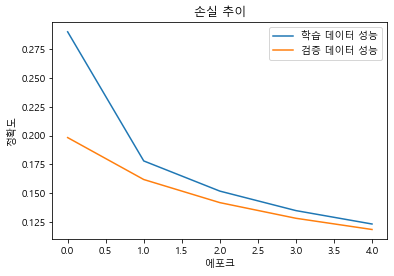

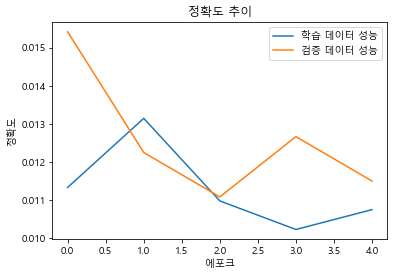

In [10]:
from matplotlib import font_manager, rc
font_location = 'c:/windows/fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

plot_loss_acc(history)

In [11]:
def show_ae(autoencoder):
    encoder=autoencoder.Encoder()
    decoder=autoencoder.Decoder()
    encoded_imgs=encoder.predict(X_test)
    decoded_imgs=decoder.predict(encoded_imgs)
    n=10
    plt.figure(figsize=(20,6))
    for i in range(n):
        ax=plt.subplot(3,n,i+1)
        plt.imshow(X_test[i].reshape(28,28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ac=plt.subplot(3,n,i+1+n)
        plt.stem(encoded_imgs[i].reshape(-1))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax = plt.subplot(3, n, i + 1 + n + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

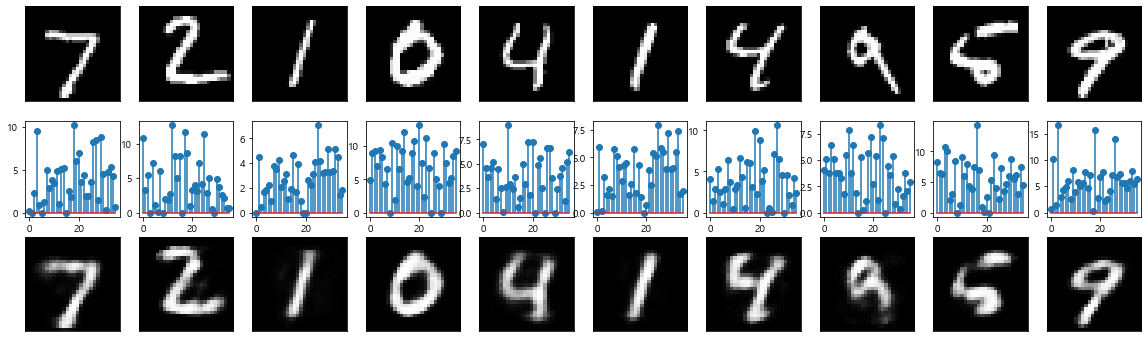

In [12]:
show_ae(autoencoder)